## Quick Sort

In [1]:
#List Preparation
import random
import time 
list_prep = [random.randint(-100,100) for i in range(9)]
print('List :', list_prep)
print('Amount :',len(list_prep))
p = list_prep.index(list_prep[0])
r = list_prep.index(list_prep[-1])

List : [-61, -55, 2, 47, -72, -12, 12, 20, -40]
Amount : 9


In [2]:
def partition(ls,p,r):
    x = ls[r]
    # print('x =',x)
    i = p - 1
    for j in range(p,r):
        if ls[j] <= x:
            i = i + 1
            # print('i =',i,end = ' ')
            #swap
            ls[i], ls[j] = ls[j], ls[i]
    ls[i+1], ls[r] = ls[r], ls[i+1]
    return i + 1


def quicksort(ls,p,r):
    if p < r:
        q = partition(ls,p,r)
        # print('q =',q)
        quicksort(ls,p,q-1)
        quicksort(ls,q+1,r)
    return ls

In [3]:
quicksort(list_prep,p,r)

[-72, -61, -55, -40, -12, 2, 12, 20, 47]

### Optional challenge:  Try to use timeit to physically time which one is faster, quicksort, mergesort heapsort, when n=10, 100, 1000?

### Merge Sort

In [22]:
import math
def merge(list,p,q,r):    
    n1 = q - p + 1 
    n2 = r - q 
    #Divide Left and Right Array
    Left,Right = [0]*(n1+1), [0]*(n2+1)
    Left[-1] = Right[-1]= math.inf
    # print(f'{Left,Right = }')

    for i in range(0,n1):
        # Left.append(list_merge[p+i-1])
        Left[i] = list[p+i-1]
    # print(f'Left Term : {Left}')

    for j in range(0,n2):
        # Right.append(list_merge[q+j])
        Right[j] = list[q+j]
    # print(f'Right Term : {Right}')

    #Merge
    i = j = 0 
    for k in range(p-1,r):
        # print(k, end = ': ')
        if Left[i] <= Right[j]:
            # print(f'{Left[i]} less than R {Right[j]}')
            list[k] = Left[i]
            i = i + 1
        else :
            # print(f'{Left[i]} more than R {Right[j]}')
            list[k] = Right[j]
            j = j + 1
    # print()
    # print(list)

def merge_sort(list,p,r):
    if p < r:
        q = (p+r)//2
        # print('q =',q)
        merge_sort(list,p,q)
        merge_sort(list,q+1,r)
        merge(list,p,q,r)

### Heap Sort

In [23]:
def Left(i):
    return 2*i+1

def Right(i):
    return 2*i+2

def Max_Heapify(ls, heap_size, i):
    # Find largest among root and children
    l = Left(i)
    r = Right(i)
    
    #Left child and is greater than root
    if l < heap_size and ls[l] > ls[i]:
        largest = l
    else:
        largest = i
        
    #Right child and is greater than root
    if r < heap_size and ls[r] > ls[largest]:
        largest = r

    # print(f'{largest,l,r = }')
    
    #Swap root
    if largest != i:
        ls[i], ls[largest] = ls[largest], ls[i]
        # print(f'{ls[i], ls[largest] = }')
        Max_Heapify(ls, heap_size, largest)
    
def Build_Max_Heap(ls,heap_size):
    for i in range(heap_size//2, -1, -1):
        # print('Round', i)
        Max_Heapify(ls, heap_size, i)
        
def HeapSort(ls):
    heap_size = len(ls)
  
    Build_Max_Heap(ls,heap_size)

    for i in range(heap_size-1, 0, -1):
        ls[i], ls[0] = ls[0], ls[i] 
        Max_Heapify(ls, i, 0)

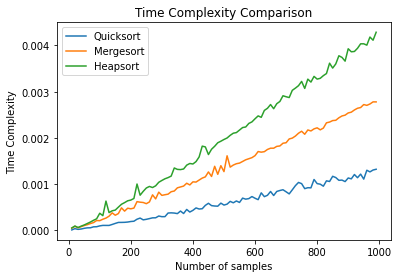

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from timeit import timeit
num_samples = range(10,1000,10)
c = 1/500000
time_interval_quicksort = []
time_interval_mergesort = []
time_interval_heapsort = []

for n in num_samples:
    mylist = random.sample(range(n),n)
    time1 = timeit('quicksort(mylist, mylist.index(mylist[0]), mylist.index(mylist[-1]) )',number=1,globals=globals() )
    time_interval_quicksort.append(time1)
    time2 = timeit('merge_sort(mylist,mylist.index(mylist[0])+1,mylist.index(mylist[-1])+1)',number=1,globals=globals())
    time_interval_mergesort.append(time2)
    time3 = timeit('HeapSort(mylist)',number=1,globals=globals())
    time_interval_heapsort.append(time3)

plt.plot(num_samples,time_interval_quicksort,label='Quicksort')
plt.plot(num_samples,time_interval_mergesort,label='Mergesort')
plt.plot(num_samples,time_interval_heapsort,label='Heapsort')
plt.legend()
plt.xlabel("Number of samples")
plt.ylabel("Time Complexity")
plt.title("Time Complexity Comparison")
plt.show()